# merge highres with quick at 100 kpc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

from astropy.table import vstack
#---------------------------------------------------------------------------#
#User imports
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *


Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |


In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def merge_iso(iso_highres,iso_quick, merge_location):
    id_highres=find_nearest(iso_highres['sma_kpc'],merge_location)-1
    id_quick=find_nearest(iso_quick['sma_kpc'],merge_location)+1
    
    highres_half = iso_highres[:id_highres]
    quick_half = iso_quick[id_quick:]
    
    return vstack([highres_half,quick_half])

## TNG

In [3]:
tng_highres_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2_highres.hdf5'
tng_quick_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
pixel_scale_highres, pixel_scale_quick = get_pixel_scale(tng_highres_file), get_pixel_scale(tng_quick_file)
print pixel_scale_highres, pixel_scale_quick

1.0 5.333333333333333


In [3]:
tng_isos_file_highres='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_highres.pkl'
tng_isos_file_quick='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'
tng_isos_quick = open_pkl(tng_isos_file_quick)
tng_isos_highres = open_pkl(tng_isos_file_highres)

In [6]:
merged_isos=[merge_iso(tng_isos_highres[i],tng_isos_quick[i], 100) for i in range(len(tng_isos_quick))]
# np.save('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng_merged_isos.npy', np.array(merged_isos))

In [8]:
#save as pickel
outfile_loc = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/'

pkl_isos = open(outfile_loc+'TNG_isos_{0}.pkl'.format('merged'),'wb')
pickle.dump(merged_isos,pkl_isos)
pkl_isos.close()


#### check with randoms 

In [6]:
np.random.seed(0)
N=5
random_indices = np.random.choice(range(len(tng_isos_highres)),N)
print random_indices

[172  47 117 192  67]


In [7]:
random_isos_highres = []
random_isos_quick = []

for i in random_indices:
    
        iso_quick = tng_isos_quick[i]
        iso_highres = tng_isos_highres[i]
        
        random_isos_quick.append(iso_quick)
        random_isos_highres.append(iso_highres)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


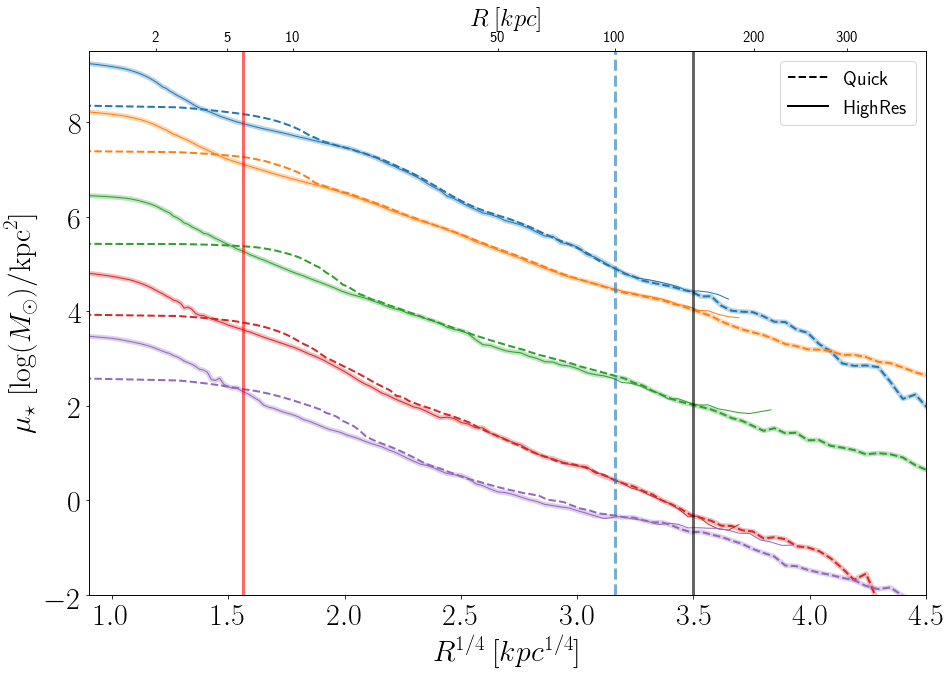

In [9]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    
    merged_iso = merge_iso(iso_highres,iso_quick, 100)
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=1, 
                 alpha=1, label='_nolegend_', zorder=2, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    
    ax1.plot((merged_iso['sma_kpc']) ** 0.25,
         np.log10(merged_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) - (n*1.5), linewidth=5, alpha=0.3, 
             label='_nolegend_', zorder=1, c=p[0].get_color(), linestyle='-')

# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes', zorder=1, c='k') 

######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## Illustris

In [3]:
Illustris_file_highres = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2_highres.hdf5'
f = h5py.File(Illustris_file_highres, 'r')
map_size = f['config'].attrs['map_range_min']
n_pixels = f['config'].attrs['map_npixel']
pixel_scale_highres=2 * (map_size/n_pixels)
f.close()

print 'pixel scale: ', pixel_scale_highres
print map_size, n_pixels

pixel scale:  1.0
150.0 300


In [3]:
illustris_highres_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2_highres.hdf5'
illustris_quick_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'
pixel_scale_highres, pixel_scale_quick = get_pixel_scale(illustris_highres_file), get_pixel_scale(illustris_quick_file)
print pixel_scale_highres, pixel_scale_quick

1.0 5.333333333333333


In [4]:
illustris_isos_file_highres='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_highres.pkl'
illustris_isos_file_quick='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick.pkl'
illustris_isos_quick = open_pkl(illustris_isos_file_quick)
illustris_isos_highres = open_pkl(illustris_isos_file_highres)

In [5]:
merged_isos=[merge_iso(illustris_isos_highres[i],illustris_isos_quick[i], 100) for i in range(len(illustris_isos_quick))]
# np.save('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/illustris_merged_isos_mean.npy', np.array(merged_isos))

In [6]:
len(merged_isos)

339

In [7]:
#save as pickel
outfile_loc = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/'

pkl_isos = open(outfile_loc+'Illustris_isos_{0}.pkl'.format('merged'),'wb')
pickle.dump(merged_isos,pkl_isos)
pkl_isos.close()

#### check with randoms

In [7]:
np.random.seed(0)
N=5
random_indices = np.random.choice(range(len(illustris_isos_highres)),N)
print random_indices

[172  47 117 192 323]


In [8]:
random_isos_highres = []
random_isos_quick = []

for i in random_indices:
    
        iso_quick = illustris_isos_quick[i]
        iso_highres = illustris_isos_highres[i]
        
        random_isos_quick.append(iso_quick)
        random_isos_highres.append(iso_highres)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


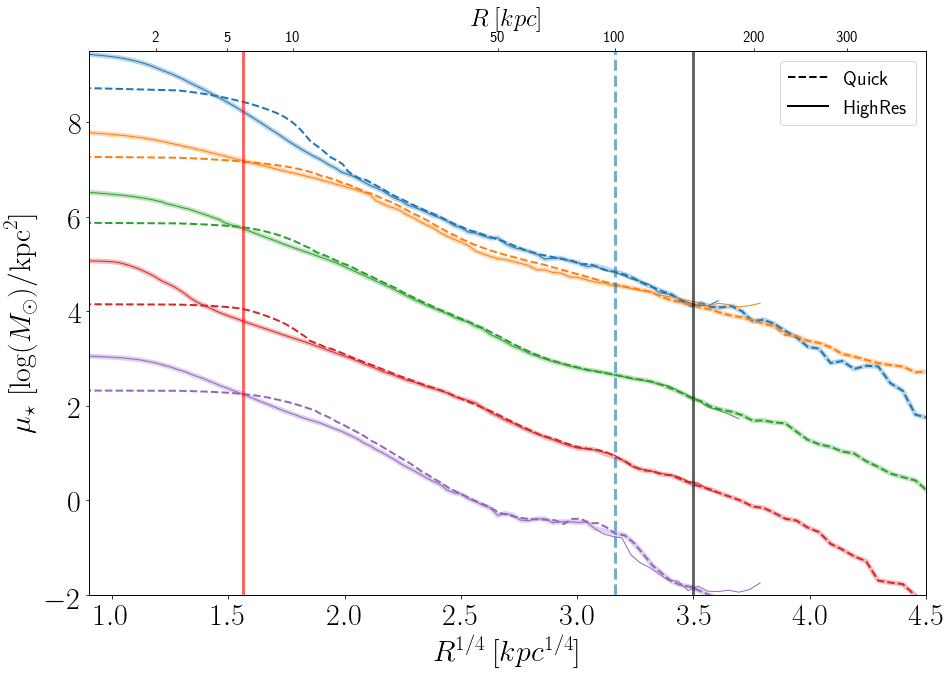

In [9]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    
    merged_iso = merge_iso(iso_highres,iso_quick, 100)
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=1, 
                 alpha=1, label='_nolegend_', zorder=2, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    
    ax1.plot((merged_iso['sma_kpc']) ** 0.25,
         np.log10(merged_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) - (n*1.5), linewidth=5, alpha=0.3, 
             label='_nolegend_', zorder=1, c=p[0].get_color(), linestyle='-')

# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes', zorder=1, c='k') 

######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()